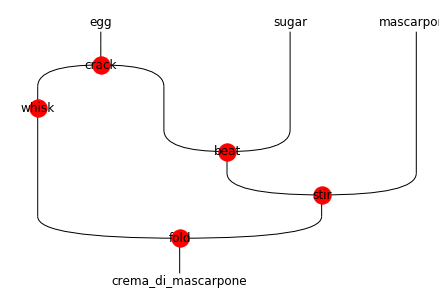

In [7]:
from discopy import Ty, Box, Id

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
sugar, mascarpone = Ty('sugar'), Ty('mascarpone')
yolky_paste, thick_paste = Ty('yolky_paste'), Ty('thick_paste')
crema_di_mascarpone = Ty('crema_di_mascarpone')

crack = Box('crack', egg, white @ yolk)
beat = Box('beat', yolk @ sugar, yolky_paste)
whisk = Box('whisk', white, white)
stir = Box('stir', yolky_paste @ mascarpone, thick_paste)
fold = Box('fold', white @ thick_paste, crema_di_mascarpone)


recipe = crack @ Id(sugar @ mascarpone)\
    >> whisk @ beat @ Id(mascarpone)\
    >> Id(white) @ stir\
    >> fold

recipe.draw(aspect='auto')

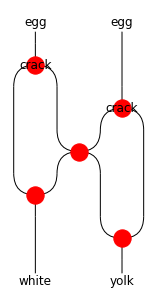

In [6]:
merge = lambda x: Box('', x @ x, x)
swap = lambda x, y: Box('', x @ y, y @ x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw()

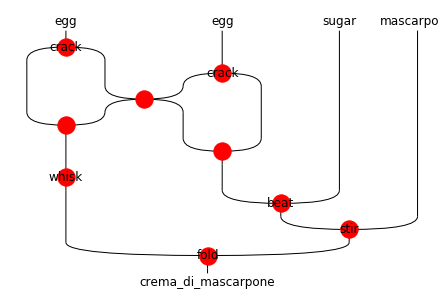

In [4]:
from discopy import MonoidalFunctor, Quiver

ob = Quiver(lambda x: x @ x if x == egg else x)
ar = Quiver(lambda f: crack_two_eggs if f == crack else f)
F = MonoidalFunctor(ob, ar)
F(recipe).draw(aspect='auto')